<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import numpy as np

from scipy import stats

e = np.exp(1)
np.random.seed(4)


def pdf(x):
    return 0.5 * (stats.norm(scale=0.25 / e).pdf(x) + stats.norm(scale=4 / e).pdf(x))


y = np.random.normal(scale=0.5, size=(30000))
x = np.random.normal(scale=0.5, size=(30000))
z = np.random.normal(scale=0.1, size=len(x))

density = pdf(x) * pdf(y)
pdf_z = pdf(5 * z)

density *= pdf_z

a = x + y
b = 2 * y
c = a - b + z

norm = np.sqrt(a.var() + b.var())
a /= norm
b /= norm

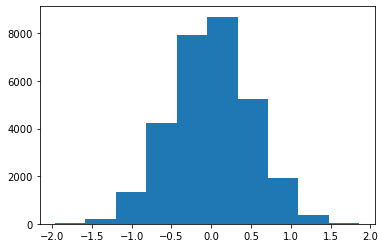

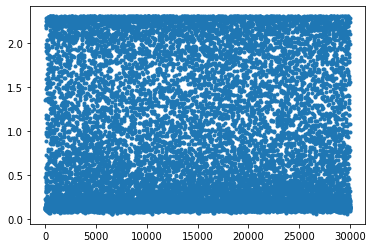

(array([2.9381e+04, 2.5300e+02, 1.2000e+02, 7.8000e+01, 6.0000e+01,
        4.1000e+01, 2.2000e+01, 1.7000e+01, 1.3000e+01, 1.5000e+01]),
 array([7.80041777e-04, 1.16274574e+00, 2.32471145e+00, 3.48667715e+00,
        4.64864285e+00, 5.81060855e+00, 6.97257426e+00, 8.13453996e+00,
        9.29650566e+00, 1.04584714e+01, 1.16204371e+01]),
 <BarContainer object of 10 artists>)

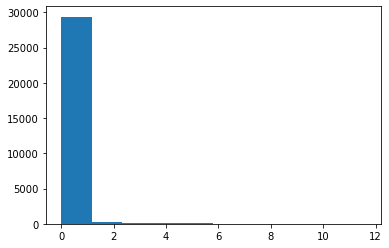

In [13]:
plt.hist(x)
plt.show()
plt.plot(pdf(x),'.')
plt.show()
plt.hist(density)

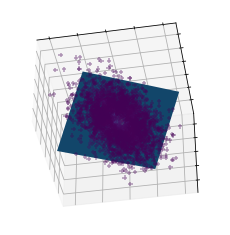

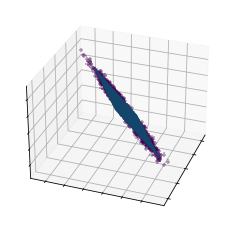

In [2]:
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

# unused but required import for doing 3d projections with matplotlib < 3.2
import mpl_toolkits.mplot3d  # noqa: F401


def plot_figs(fig_num, elev, azim):
    fig = plt.figure(fig_num, figsize=(4, 3))
    plt.clf()
    ax = fig.add_subplot(111, projection="3d", elev=elev, azim=azim)
    ax.set_position([0, 0, 0.95, 1])

    ax.scatter(a[::10], b[::10], c[::10], c=density[::10], marker="+", alpha=0.4)
    Y = np.c_[a, b, c]

    # Using SciPy's SVD, this would be:
    # _, pca_score, Vt = scipy.linalg.svd(Y, full_matrices=False)

    pca = PCA(n_components=3)
    pca.fit(Y)
    V = pca.components_.T

    x_pca_axis, y_pca_axis, z_pca_axis = 3 * V
    x_pca_plane = np.r_[x_pca_axis[:2], -x_pca_axis[1::-1]]
    y_pca_plane = np.r_[y_pca_axis[:2], -y_pca_axis[1::-1]]
    z_pca_plane = np.r_[z_pca_axis[:2], -z_pca_axis[1::-1]]
    x_pca_plane.shape = (2, 2)
    y_pca_plane.shape = (2, 2)
    z_pca_plane.shape = (2, 2)
    ax.plot_surface(x_pca_plane, y_pca_plane, z_pca_plane)
    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])
    ax.zaxis.set_ticklabels([])


elev = -40
azim = -80
plot_figs(1, elev, azim)

elev = 30
azim = 20
plot_figs(2, elev, azim)

plt.show()